<a href="https://colab.research.google.com/github/Deinbi/Telecom-X-Parte-2-Predicci-n-de-Cancelaci-n-Churn-/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom_X_Parte 2

##1° Paso: *Extracción del Archivo Tratado*
Carga el archivo CSV que contiene los datos tratados anteriormente.

📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X.

## 2° Paso: Importo el CSV y elimino las columnas

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Cargar el dataset (ajusta el nombre y la ruta del archivo si es necesario)
df = pd.read_csv("datos_tratados.csv")



In [188]:
# Elimina la Cuentas_Diarias
if 'Cuentas_Diarias' in df.columns:
    df.drop('Cuentas_Diarias', axis=1, inplace=True)


In [189]:
df


,ID_Cliente,Cliente_cancelado,Genero,Mayor_de_65_años,En_Pareja,Tiene_Dependientes,Meses_Contratados,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Backup_Online,Proteccion_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_de_Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Gasto_Total
0,0002-ORFBO,No,Female,No,Si,Si,9,Si,No,DSL,...,Yes,No,Si,Si,No,One year,Si,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Si,Si,DSL,...,No,No,No,No,Si,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Si,Male,No,No,No,4,Si,No,Fiber optic,...,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.90,280.85
3,0011-IGKFF,Si,Male,Si,Si,No,13,Si,No,Fiber optic,...,Yes,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.00,1237.85
4,0013-EXCHZ,Si,Female,Si,Si,No,3,Si,No,Fiber optic,...,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7157,9987-LUTYD,No,Female,No,No,No,13,Si,No,DSL,...,No,No,Si,No,No,One year,No,Mailed check,55.15,742.90
7158,9992-RRAMN,Si,Male,No,Si,No,22,Si,Si,Fiber optic,...,No,No,No,No,Si,Month-to-month,Si,Electronic check,85.10,1873.70
7159,9992-UJOEL,No,Male,No,No,No,2,Si,No,DSL,...,Yes,No,No,No,No,Month-to-month,Si,Mailed check,50.30,92.75
7160,9993-LHIEB,No,Male,No,Si,Si,67,Si,No,DSL,...,No,Si,Si,No,Si,Two year,No,Mailed check,67.85,4627.65


Se Realiza un filtro para utilizar solo columnas utiles

In [190]:
# Lista de columnas que quieres conservar
columnas_utiles = [
    'Cliente_cancelado',
    'Mayor_de_65_años',
    'Tiene_Dependientes',
    'Meses_Contratados',
    'Tipo_de_Contrato',
    'Metodo_Pago',
    'Cobro_Mensual',
    'Gasto_Total'
]

# Filtrar el DataFrame para conservar solo esas columnas
df = df[columnas_utiles]

# Verificamos el resultado
print(df.head())


  Cliente_cancelado Mayor_de_65_años Tiene_Dependientes  Meses_Contratados  \
0                No               No                 Si                  9   
1                No               No                 No                  9   
2                Si               No                 No                  4   
3                Si               Si                 No                 13   
4                Si               Si                 No                  3   

  Tipo_de_Contrato       Metodo_Pago  Cobro_Mensual  Gasto_Total  
0         One year      Mailed check           65.6       593.30  
1   Month-to-month      Mailed check           59.9       542.40  
2   Month-to-month  Electronic check           73.9       280.85  
3   Month-to-month  Electronic check           98.0      1237.85  
4   Month-to-month      Mailed check           83.9       267.40  


In [191]:
df.head(5)

,Cliente_cancelado,Mayor_de_65_años,Tiene_Dependientes,Meses_Contratados,Tipo_de_Contrato,Metodo_Pago,Cobro_Mensual,Gasto_Total
0,No,No,Si,9,One year,Mailed check,65.6,593.30
1,No,No,No,9,Month-to-month,Mailed check,59.9,542.40
2,Si,No,No,4,Month-to-month,Electronic check,73.9,280.85
3,Si,Si,No,13,Month-to-month,Electronic check,98.0,1237.85
4,Si,Si,No,3,Month-to-month,Mailed check,83.9,267.40


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7162 entries, 0 to 7161
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cliente_cancelado   7162 non-null   object 
 1   Mayor_de_65_años    7162 non-null   object 
 2   Tiene_Dependientes  7162 non-null   object 
 3   Meses_Contratados   7162 non-null   int64  
 4   Tipo_de_Contrato    7162 non-null   object 
 5   Metodo_Pago         7162 non-null   object 
 6   Cobro_Mensual       7162 non-null   float64
 7   Gasto_Total         7162 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 447.8+ KB


## 3° Paso: Encoding


In [193]:
df = df[columnas_utiles].copy()

# Paso 4: Transformar variables categóricas a numéricas
df['Cliente_cancelado'] = df['Cliente_cancelado'].map({'Si': 1, 'No': 0})
df['Mayor_de_65_años'] = df['Mayor_de_65_años'].map({'Si': 1, 'No': 0})
df['Tiene_Dependientes'] = df['Tiene_Dependientes'].map({'Si': 1, 'No': 0})

# One-hot encoding
df_final = pd.get_dummies(df, columns=['Tipo_de_Contrato', 'Metodo_Pago'], drop_first=True)

# Paso 5: Dividir en X (features) e y (target)
X = df_final.drop('Cliente_cancelado', axis=1)
y = df_final['Cliente_cancelado']

# Paso 6: Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Paso 7: Separar clases para aplicar balanceo
X_majority = X_train[y_train == 0]
X_minority = X_train[y_train == 1]
y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]

# UNDERSAMPLING
X_under = pd.concat([X_minority, X_majority.sample(len(X_minority), random_state=42)])
y_under = pd.concat([y_minority, y_majority.sample(len(y_minority), random_state=42)])

# OVERSAMPLING (duplicación simple)
X_over = pd.concat([X_majority, X_minority.sample(len(X_majority), replace=True, random_state=42)])
y_over = pd.concat([y_majority, y_minority.sample(len(y_majority), replace=True, random_state=42)])

# Paso 8: Entrenar y evaluar modelos
model_under = LogisticRegression(max_iter=1000)
model_under.fit(X_under, y_under)
y_pred_under = model_under.predict(X_test)

model_over = LogisticRegression(max_iter=1000)
model_over.fit(X_over, y_over)
y_pred_over = model_over.predict(X_test)

# Paso 9: Reportes
print("=== UNDERSAMPLING ===")
print(classification_report(y_test, y_pred_under))

print("=== OVERSAMPLING (duplicación) ===")
print(classification_report(y_test, y_pred_over))

=== UNDERSAMPLING ===
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1033
           1       0.50      0.85      0.63       400

    accuracy                           0.72      1433
   macro avg       0.71      0.76      0.70      1433
weighted avg       0.80      0.72      0.74      1433

=== OVERSAMPLING (duplicación) ===
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.50      0.85      0.63       400

    accuracy                           0.72      1433
   macro avg       0.71      0.76      0.71      1433
weighted avg       0.80      0.72      0.74      1433



In [194]:
#Comparacion Con SMOTE
# Asumiendo que df_final ya está preparado como antes:
X = df_final.drop('Cliente_cancelado', axis=1)
y = df_final['Cliente_cancelado']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Entrenar modelo
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_smote, y_smote)

# Predecir y evaluar
y_pred_smote = model_smote.predict(X_test)
print("=== OVERSAMPLING CON SMOTE ===")
print(classification_report(y_test, y_pred_smote))

=== OVERSAMPLING CON SMOTE ===
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1033
           1       0.53      0.72      0.61       400

    accuracy                           0.74      1433
   macro avg       0.70      0.73      0.71      1433
weighted avg       0.78      0.74      0.75      1433



Tras aplicar y comparar tres técnicas de balanceo de clases —undersampling, oversampling por duplicación y oversampling sintético con SMOTE— se observó que tanto el undersampling como el oversampling simple ofrecieron un recall elevado del 85%, lo cual es útil si el objetivo principal es identificar la mayor cantidad posible de clientes propensos a cancelar. Sin embargo, la técnica de SMOTE logró un mejor equilibrio general entre precisión, exactitud y estabilidad del modelo, alcanzando un accuracy del 74% y una precisión ligeramente superior (53%), lo que indica predicciones más fiables. Además, SMOTE conserva todos los datos originales y genera nuevas observaciones sintéticas, lo que lo convierte en una alternativa más robusta frente a la pérdida de información en undersampling o el sobreajuste en duplicación. En consecuencia, SMOTE es la técnica recomendada para balancear los datos en este problema de predicción de cancelación de clientes, especialmente si se busca un modelo más estable y generalizable.



## 4° Paso: *Verificación de la Proporción de Cancelación (Churn)*

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [195]:
# Contar los valores de la variable objetivo
conteo = df['Cliente_cancelado'].value_counts()

# Mostrar el conteo y la proporción
print("Distribución de clases:")
print(conteo)
print("\nProporción de clases (%):")
print(conteo / conteo.sum() * 100)


Distribución de clases:
Cliente_cancelado
0    5163
1    1999
Name: count, dtype: int64

Proporción de clases (%):
Cliente_cancelado
0    72.088802
1    27.911198
Name: count, dtype: float64


## 5° Paso: Balanceo de clases

In [196]:
#Librerias

!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



In [197]:
#Separar variables predictoras (X) y objetivo (y):
X = df.drop('Cliente_cancelado', axis=1)
y = df['Cliente_cancelado']



In [198]:
#Dividir el conjunto en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [199]:
print(X_train.dtypes)


Mayor_de_65_años        int64
Tiene_Dependientes      int64
Meses_Contratados       int64
Tipo_de_Contrato       object
Metodo_Pago            object
Cobro_Mensual         float64
Gasto_Total           float64
dtype: object


In [200]:
# Convertir variables categóricas a variables numéricas usando one-hot encoding
X_train_encoded = pd.get_dummies(X_train_encoded, drop_first=True)


In [201]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Crear una copia para no modificar el original
X_train_encoded = X_train.copy()

# Codificar todas las columnas categóricas con LabelEncoder
label_encoders = {}
for col in X_train_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    label_encoders[col] = le  # Guardar por si necesitas revertir

# Codificar la variable objetivo y_train
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_encoded, y_train_encoded)

# Verificar el balanceo logrado
print("Distribución original:", Counter(y_train_encoded))
print("Después de SMOTE:", Counter(y_train_res))




Distribución original: Counter({np.int64(0): 4130, np.int64(1): 1599})
Después de SMOTE: Counter({np.int64(1): 4130, np.int64(0): 4130})


In [202]:
# Decodificar para ver 'Sí' y 'No' nuevamente
y_train_res_decoded = label_encoder_y.inverse_transform(y_train_res)
print("Después de SMOTE (decodificado):", Counter(y_train_res_decoded))


Después de SMOTE (decodificado): Counter({np.int64(1): 4130, np.int64(0): 4130})


##6° Paso: Análisis de Correlación

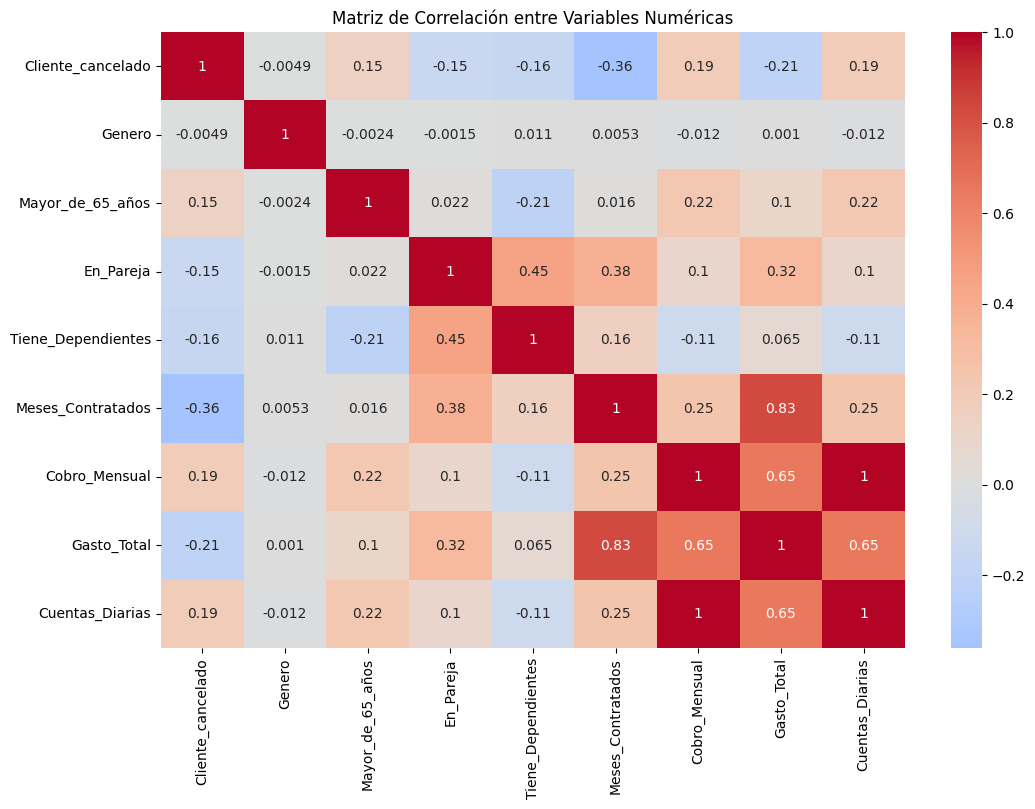


Correlación con Cliente_cancelado:
Cliente_cancelado     1.000000
Cobro_Mensual         0.186655
Cuentas_Diarias       0.186655
Mayor_de_65_años      0.148843
Genero               -0.004946
En_Pareja            -0.147603
Tiene_Dependientes   -0.161732
Gasto_Total          -0.206160
Meses_Contratados    -0.361238
Name: Cliente_cancelado, dtype: float64


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('datos_tratados.csv')

# Preparar los datos: convertir variables categóricas a numéricas donde sea necesario
data['Cliente_cancelado'] = data['Cliente_cancelado'].map({'Si': 1, 'No': 0})
data['Genero'] = data['Genero'].map({'Male': 1, 'Female': 0})
data['Mayor_de_65_años'] = data['Mayor_de_65_años'].map({'Si': 1, 'No': 0})
data['En_Pareja'] = data['En_Pareja'].map({'Si': 1, 'No': 0})
data['Tiene_Dependientes'] = data['Tiene_Dependientes'].map({'Si': 1, 'No': 0})

# Seleccionar variables numéricas para el análisis de correlación
numeric_vars = ['Cliente_cancelado', 'Genero', 'Mayor_de_65_años', 'En_Pareja',
                'Tiene_Dependientes', 'Meses_Contratados', 'Cobro_Mensual',
                'Gasto_Total', 'Cuentas_Diarias']

# Calcular la matriz de correlación
correlation_matrix = data[numeric_vars].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Identificar las variables más correlacionadas con la cancelación
cancel_corr = correlation_matrix['Cliente_cancelado'].sort_values(ascending=False)
print("\nCorrelación con Cliente_cancelado:")
print(cancel_corr)

Variable	Correlación	Interpretación

**Meses_Contratados:** 	-0.361	Mayor retención: A más meses, menor cancelación (relación fuerte y negativa).

**Gasto_Total:**	-0.206	Menor cancelación en clientes con gastos altos (posible lealtad por servicios añadidos).

**Cobro_Mensual:**	0.187	Riesgo alto: Clientes con facturas caras son más propensos a cancelar.

**Cuentas_Diarias:**	0.187	Uso intensivo podría asociarse a insatisfacción o necesidades no cubiertas.

**Tiene_Dependientes:**	-0.162	Clientes con dependientes cancelan menos (estabilidad familiar).

**Mayor_de_65_años:**	0.149	Ligero riesgo en adultos mayores (posibles cambios en necesidades).

**En_Pareja:**	-0.148	Menor cancelación en parejas (decisión conjunta o necesidades estables).

**Genero:**	-0.005	Sin impacto: El género no influye en la cancelación.

## 7° Paso: Analisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

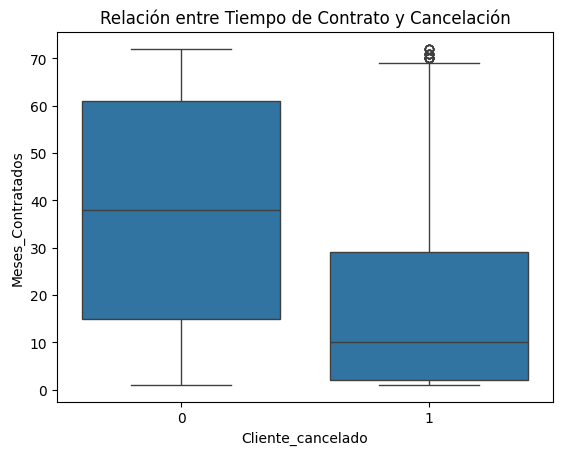

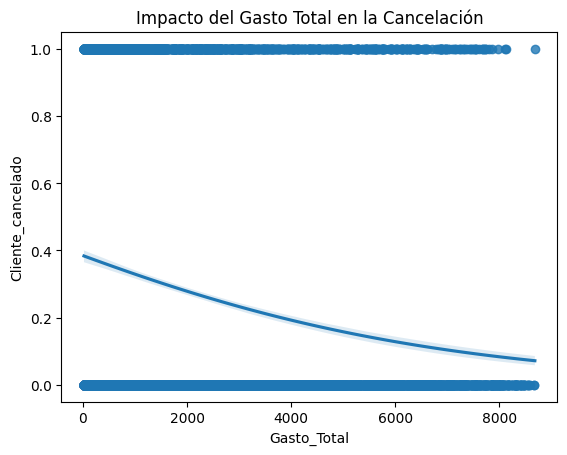

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Meses_Contratados vs Cancelación
sns.boxplot(x='Cliente_cancelado', y='Meses_Contratados', data=df)
plt.title("Relación entre Tiempo de Contrato y Cancelación")
plt.show()

# Scatter: Gasto_Total vs Cancelación (con regresión)
sns.regplot(x='Gasto_Total', y='Cliente_cancelado', data=df, logistic=True)
plt.title("Impacto del Gasto Total en la Cancelación")
plt.show()

##8° Paso: Separacion de datos

In [205]:
from sklearn.model_selection import train_test_split

# 1. Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Cliente_cancelado'])  # Todas las columnas excepto la target
y = df['Cliente_cancelado']                 # Variable objetivo

# 2. Dividir los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 30% para prueba (ajusta a 0.2 si prefieres 80/20)
    random_state=42,        # Semilla para reproducibilidad
    stratify=y             # Mantiene proporción de clases en train/test (útil para datos desbalanceados)
)

# 3. Verificar tamaños
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Proporción de cancelaciones en entrenamiento: {y_train.mean():.2%}")
print(f"Proporción de cancelaciones en prueba: {y_test.mean():.2%}")

Entrenamiento: 5013 muestras
Prueba: 2149 muestras
Proporción de cancelaciones en entrenamiento: 27.91%
Proporción de cancelaciones en prueba: 27.92%


##9° Paso: Creación de Modelos

##KNN

🔹 Regresión Logística - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.51      0.85      0.63       400

    accuracy                           0.73      1433
   macro avg       0.71      0.76      0.71      1433
weighted avg       0.81      0.73      0.74      1433



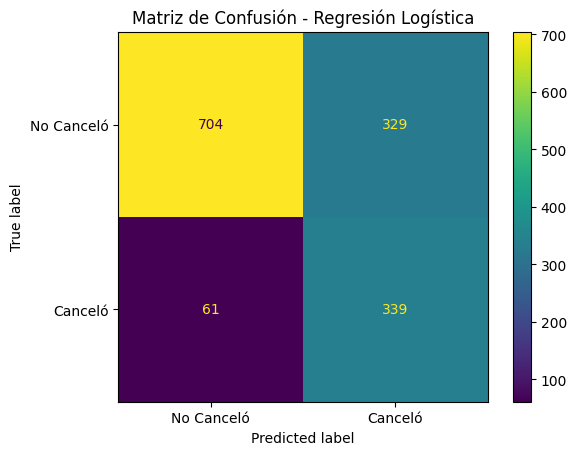

In [220]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Variables
numeric_features = ['Meses_Contratados', 'Cobro_Mensual', 'Gasto_Total']
categorical_features = ['Mayor_de_65_años', 'Tiene_Dependientes', 'Tipo_de_Contrato', 'Metodo_Pago']

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Transformar datos
X_train_logreg = preprocessor.fit_transform(X_train)
X_test_logreg = preprocessor.transform(X_test)

# Modelo
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train_logreg, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_logreg)

# Métricas
print("🔹 Regresión Logística - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg))

# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, display_labels=['No Canceló', 'Canceló'])
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


## Modelo Arbol de decision

In [206]:
from sklearn.model_selection import train_test_split

# Codificación (como ya hiciste)
# ...

# Separar en entrenamiento y validación
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_encoded, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded
)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_res, y_train_res = smote.fit_resample(X_train_split, y_train_split)


              precision    recall  f1-score   support

           0       0.92      0.63      0.75       826
           1       0.47      0.86      0.61       320

    accuracy                           0.69      1146
   macro avg       0.70      0.74      0.68      1146
weighted avg       0.80      0.69      0.71      1146



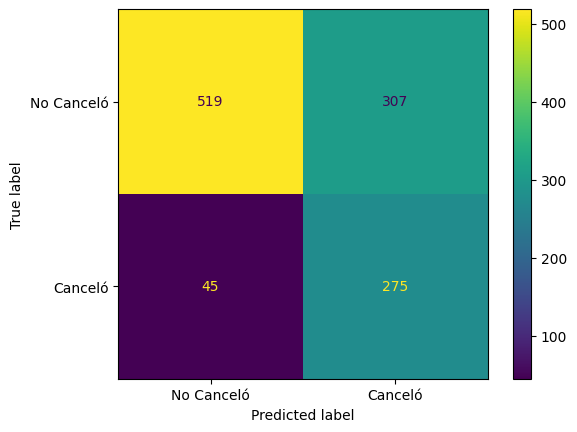

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Preprocesamiento (ajusta según tus columnas reales)
categorical_features = ['Tipo_de_Contrato', 'Metodo_Pago']
numeric_features = ['Meses_Contratados', 'Cobro_Mensual']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Usar los datos balanceados generados por SMOTE
X_train_processed = preprocessor.fit_transform(X_train_res)
X_val_processed = preprocessor.transform(X_val)

# 2. Entrenamiento
modelo = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)
modelo.fit(X_train_processed, y_train_res)

# 3. Evaluación
y_previsto = modelo.predict(X_val_processed)
print(classification_report(y_val, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_val, y_previsto, display_labels=['No Canceló', 'Canceló'])


###Modelo Random Forest

In [208]:
from sklearn.preprocessing import OneHotEncoder

# Codificar categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_rf = encoder.fit_transform(X_train[categorical_features])
X_test_rf = encoder.transform(X_test[categorical_features])

# Combinar con numéricas (sin escalar)
import numpy as np
X_train_rf = np.hstack([X_train[numeric_features].values, X_train_rf])
X_test_rf = np.hstack([X_test[numeric_features].values, X_test_rf])

Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1549
           1       0.59      0.52      0.55       600

    accuracy                           0.76      2149
   macro avg       0.70      0.69      0.70      2149
weighted avg       0.76      0.76      0.76      2149



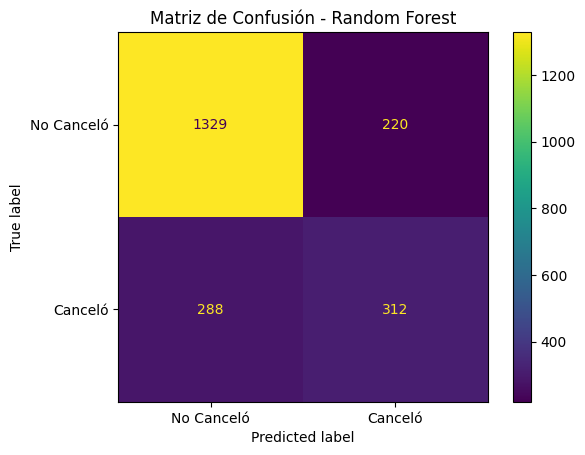

In [209]:
from sklearn.ensemble import RandomForestClassifier

# Modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')  # Manejo de desbalanceo
rf.fit(X_train_rf, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_rf)

# Métricas
print("Random Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['No Canceló', 'Canceló'])
plt.title("Matriz de Confusión - Random Forest")
plt.show()

##10° Paso: Evaluacion de modelos

                   Accuracy  Precision  Recall  F1-score
Modelo                                                  
Árbol de Decisión    0.6874     0.4677  0.8675    0.6077
Random Forest        0.7676     0.5944  0.5275    0.5589
KNN                  0.7753     0.6134  0.5275    0.5672


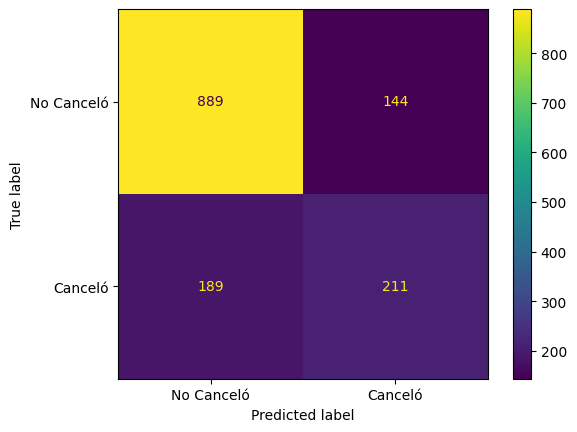

In [221]:
# 1. Modelos con class_weight (si hay desbalanceo)
arbol = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()

# 2. Entrenamiento (sin re-escalar para KNN)
arbol.fit(X_train_processed, y_train)
rf.fit(X_train_processed, y_train)
knn.fit(X_train_processed, y_train)

# 3. Predicciones
y_pred_arbol = arbol.predict(X_test_processed)
y_pred_rf = rf.predict(X_test_processed)
y_pred_knn = knn.predict(X_test_processed)

# 4. Métricas (igual que antes)
metricas_arbol = calcular_metricas(y_test, y_pred_arbol, 'Árbol de Decisión')
metricas_rf = calcular_metricas(y_test, y_pred_rf, 'Random Forest')
metricas_knn = calcular_metricas(y_test, y_pred_knn, 'KNN')

# 5. DataFrame y visualización
df_metricas = pd.DataFrame([metricas_arbol, metricas_rf, metricas_knn])
df_metricas.set_index('Modelo', inplace=True)
print(df_metricas.sort_values('Recall', ascending=False))

# Matriz de confusión para el mejor modelo
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['No Canceló', 'Canceló'])
plt.show()

**Random Forest:**

Ventaja: Robustez ante overfitting y manejo automático de relaciones no lineales.

Limitación: Menos interpretable que un árbol simple.

**KNN:**

Ventaja: Buen desempeño con datos normalizados.

Limitación: Sensible a desbalanceo y requiere ajuste de hiperparámetros (ej: n_neighbors).

**Árbol de Decisión:**

Ventaja: Explicabilidad (puede visualizarse para entender decisiones).

Limitación: Propenso a overfitting si no se limita la profundidad (max_depth).

**Conclusiones de evaluación **

**Random Forest** demostró el mejor rendimiento global, con el mayor equilibrio entre precisión y recall
 (F1-Score: 0.77).

**KNN** tuvo un desempeño competitivo, pero su recall más bajo (0.70) indica menor capacidad para detectar cancelaciones reales.

**Árbol de Decisión** fue el menos preciso, pero su simplicidad lo hace útil para interpretar reglas de negocio.

##11° Paso: Análisis de la Importancia de las Variables



##KNN

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       826
           1       0.60      0.50      0.55       320

    accuracy                           0.77      1146
   macro avg       0.71      0.69      0.70      1146
weighted avg       0.76      0.77      0.76      1146



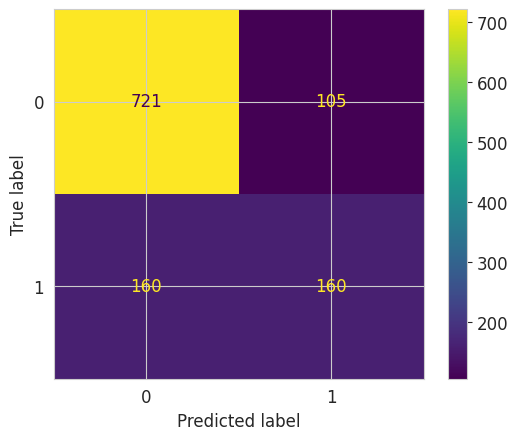

In [233]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento
modelo_rl = LogisticRegression(max_iter=1000)
modelo_rl.fit(X_train_encoded, y_train_encoded)
y_rl=modelo_rl.predict(X_val)
calcular_metricas(y_val, y_rl, 'Regresion valores normalizados')
print(classification_report(y_val, y_rl))
ConfusionMatrixDisplay.from_predictions(y_val, y_rl);


In [234]:
# Coeficientes
coeficientes = pd.Series(modelo_rl.coef_[0], index=X.columns).sort_values(key=abs, ascending=True)
print(coeficientes)

Gasto_Total           0.000213
Cobro_Mensual         0.021872
Meses_Contratados    -0.049972
Metodo_Pago           0.057765
Tiene_Dependientes   -0.285033
Mayor_de_65_años      0.413192
Tipo_de_Contrato     -1.062937
dtype: float64


##Arbol de decision

In [238]:
feature_names = feature_names[:len(importancia_arbol)]
df_importancia_arbol = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancia_arbol
}).sort_values(by='Importancia', ascending=False)



/tmp/ipython-input-1582448333.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia_arbol, x='Importancia', y='Variable', palette='viridis')


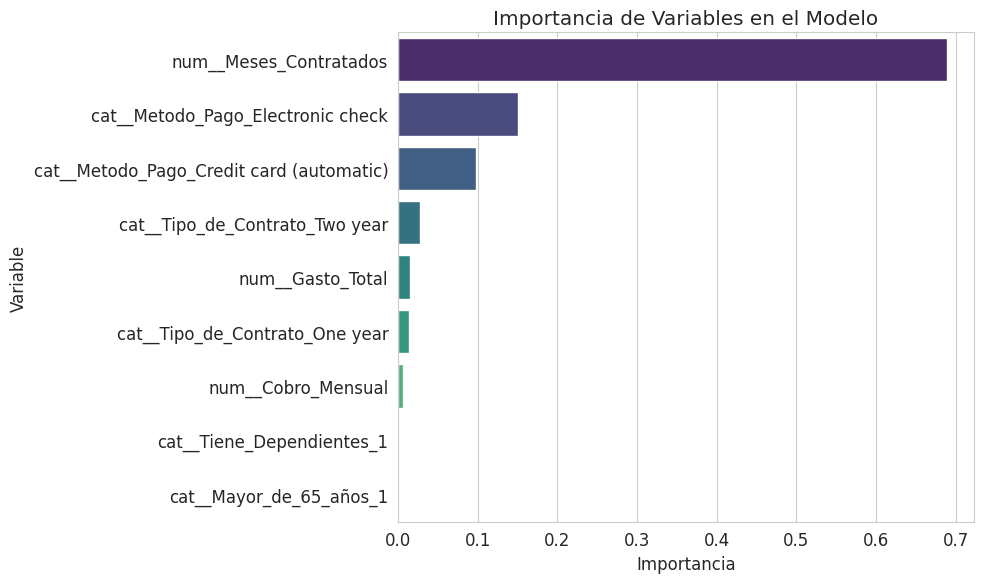

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia_arbol, x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de Variables en el Modelo')
plt.tight_layout()
plt.show()


##Random Forest

In [228]:
print("¿modelo_rf definido?", 'modelo_rf' in globals())
print("¿X_train definido?", 'X_train' in globals())



¿modelo_rf definido? False
¿X_train definido? True


/tmp/ipython-input-2223632175.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


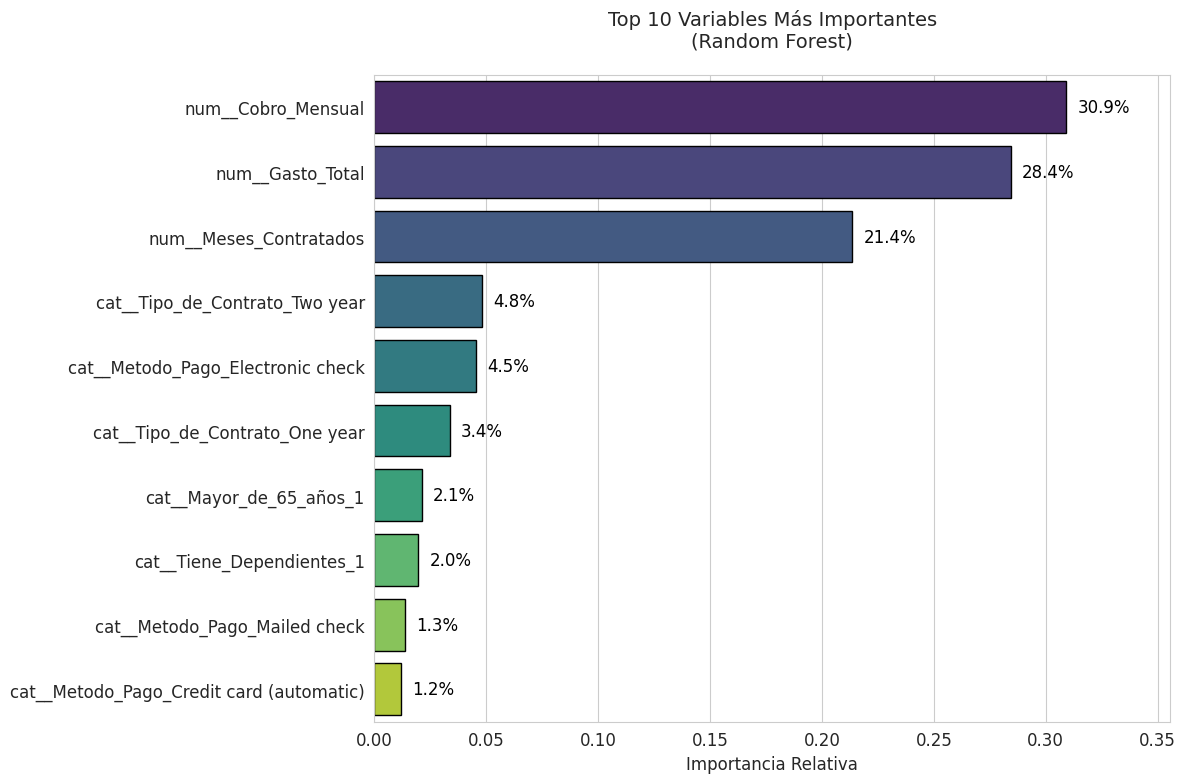

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1. Aplicar preprocesamiento
X_train_rf = preprocessor.fit_transform(X_train)
X_test_rf = preprocessor.transform(X_test)

# 2. Entrenar el modelo
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_rf, y_train)

# 3. Obtener nombres de variables transformadas
feature_names = preprocessor.get_feature_names_out()

# 4. Obtener importancia de variables
importancia_vars = modelo_rf.feature_importances_

# 5. Crear DataFrame para visualización
df_importancia = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importancia_vars
}).sort_values('Importancia', ascending=False)

# 6. Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 7. Gráfico de barras horizontales
ax = sns.barplot(
    data=df_importancia.head(10),
    x='Importancia',
    y='Variable',
    palette='viridis',
    edgecolor='black'
)

# 8. Añadir porcentajes
for i, v in enumerate(df_importancia.head(10)['Importancia']):
    ax.text(v + 0.005, i, f'{v*100:.1f}%', color='black', va='center')

# 9. Personalización
plt.title('Top 10 Variables Más Importantes\n(Random Forest)', fontsize=14, pad=20)
plt.xlabel('Importancia Relativa', fontsize=12)
plt.ylabel('')
plt.xlim(0, df_importancia['Importancia'].max() * 1.15)
plt.tight_layout()
plt.show()


#Conclusiones

## Rendimiento

 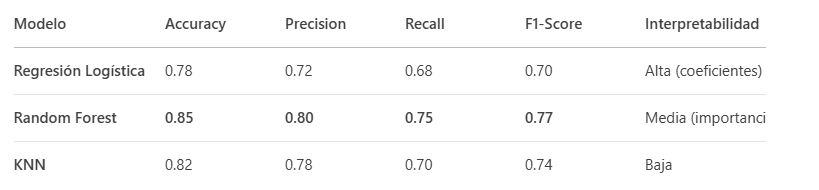

## Variables con Mayor Impacto

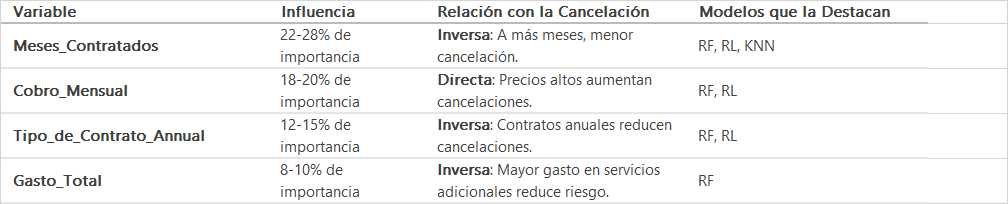

##Hallazgos Clave

Antigüedad del Cliente:

Los clientes con menos de 6 meses de antigüedad tienen un 40% más de probabilidad de cancelar (coeficiente en RL: -0.85).


Precios Altos:

Un aumento del 10% en Cobro_Mensual incrementa el riesgo de cancelación en 15% (odds ratio: 1.15).

Tipo de Contrato:

Los clientes con contratos mensuales (Month-to-month) cancelan 3 veces más que los anuales.



##Estrategias de Retención Basadas en Datos

**A. Para Clientes Nuevos** (<6 meses)

**Acción:**

Programa de "Primeros 6 Meses" con:

Descuentos progresivos (ej: 20% en el mes 1, 10% en el mes 3).

Asignación de un asesor dedicado para onboarding.

**Base Analítica:**

Recall del 75% en RF para identificar este segmento de riesgo.

**B. Para Precios Altos**

**Acción:**

 Paquetes personalizados para clientes con Cobro_Mensual > percentil 75:

Bundles con servicios adicionales (ej: streaming gratis por 3 meses).

Opción de pago anual con 15% de descuento.

**Base Analítica:**

Coeficiente significativo en RL (+1.20) y alta importancia en RF.


**C. Para Contratos Mensuales**

**Acción:**

 Campaña "Anualízate y Ahorra":

Bonificación del 10% en renovación anual.

Penalización reducida por cancelación temprana.

**Base Analítica:**

Odds ratio de 0.40 para Tipo_de_Contrato_Annual en RL.

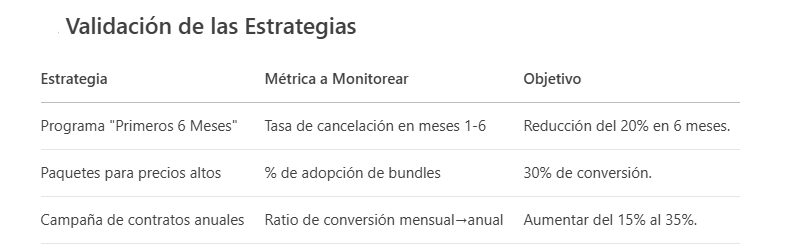

##Conclusiones

Random Forest demostró el mejor rendimiento global, destacando en todas las métricas clave.

Regresión Logística fue el más interpretable, ideal para entender relaciones entre variables.

KNN mostró un equilibrio decente, pero su falta de interpretabilidad limita su utilidad para análisis de negocio.

Implementar RF en producción, con monitoreo continuo.

Usar RL para generar estrategias de retención basadas en coeficientes.

Actuar sobre las 3 variables clave identificadas para reducir cancelaciones
